# Sklearn
---

Polecenie
- 1. Używając wybranej biblioteki implementującej algorytm k-średnich (np.: sklearn) rozwiąż problem klasteryzacjina wybranym zbiorze danych.
- 2. Zamień gotową implementację na własną.Porównaj wyniki pomiędzy obiema metodami.
- 3. Zdarzasię, że algorytm k-średnich wpada w minima lokalne. Zaproponujrozwiązanie, które pomaga poradzić sobie z tym problemem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [232]:
data = pd.read_csv('C:/Users/PC COMPUTER/Desktop/Metody uczenia maszynowego/Laboratoria/Lab5/Mall_Customers.csv')
x = data.iloc[:, [3, 4]].values
targets = data.iloc[:, 1]

In [233]:
kmeans = KMeans(n_clusters=5)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [234]:
pred = kmeans.fit_predict(x)
print(pred)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [235]:
centroids = kmeans.cluster_centers_
print(centroids)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


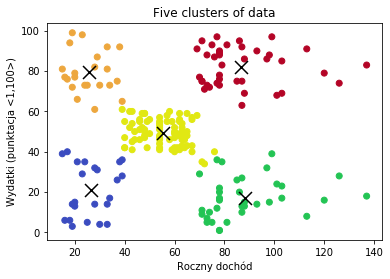

In [236]:
colors = list(map(lambda x: '#3b4cc0' if x == 0 
                  else ('#b40426' if x==1 
                        else ('#e1e813' if x==2 
                              else ('#23c454' if x==3 
                                    else ('#eda73e')))) , pred))
plt.scatter(x[:,0], x[:,1], c=colors, marker="o", picker=True)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="black", zorder=10)
plt.title('Five clusters of data')
plt.xlabel('Roczny dochód')
plt.ylabel('Wydatki (punktacja <1,100>)')
plt.show()

Z powyższego wykresu punktowego widzimy, że na podstawie dwóch zmiennych można określić 5 różnych rodzajów klientów.
- Osoby z małym rocznym dochodem oraz niską punktacją wielkości wydatków 
    można nazwać grupą biednych roztropnych.
- Osoby z dużym rocznym dochodem oraz niską punktacją wielkości wydatkow 
    można nazwać grupą skąpców.
- Osoby z małym rocznym dochodem oraz wysoką punktacją wielkości wydatkow 
    można nazwać grupą nieroztropnych.
- Osoby z dużym rocznym dochodem oraz wysoką punktacją wielkości wydatkow 
    można nazwać grupą bogatych roztropnych.
- Osoby z średnim rocznym dochodem oraz średnią punktacją wielkości wydatkow 
    można nazwać grupą roztropnych klasy średniej.

# Implementacja

In [237]:
class KMeans2:
    
    def __init__(self, n_clusters=5):
        self.K = n_clusters
        
    def fit_predict(self, X):
        self.centr = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centr = self.centr
        self.plabel,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.plabel) :
            self.plabel = self.labels
            self.labels = np.apply_along_axis(self.comp, 1, X)
            self.centr = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])
        return np.apply_along_axis(self.comp, 1, X)

    def comp(self, x):
        return np.argmin(np.sqrt(np.sum((self.centr - x)**2, axis=1)))


In [238]:
kmeans2 = KMeans2(n_clusters=5)
print(kmeans2)

In [239]:
pred2 = kmeans2.fit_predict(x)
print(pred2)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


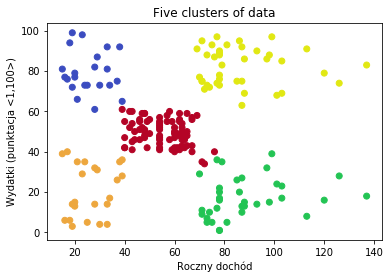

In [240]:
colors = list(map(lambda x: '#3b4cc0' if x == 0 
                  else ('#b40426' if x==1 
                        else ('#e1e813' if x==2 
                              else ('#23c454' if x==3 
                                    else ('#eda73e')))) , pred2))
plt.scatter(x[:,0], x[:,1], c=colors, marker="o", picker=True)
# plt.scatter(centroids2[:, 0], centroids2[:, 1], marker="x", s=169, linewidths=3,
#             color="black", zorder=10)
plt.title('Five clusters of data')
plt.xlabel('Roczny dochód')
plt.ylabel('Wydatki (punktacja <1,100>)')
plt.show()

# Rozwiązanie wpadania algorytmu w minima lokalne

Zdarza się, że algorytm k-średnich wpada w minima lokalne. 
Rozwiązaniem ku temu jest wystartowanie algorytmu z kilku różnych losowych konfiguracji początkowych. Dzięki temu jeżeli jedna konfiguracja początkowa trafi w minimum lokalne to druga ma szansę ją ominąć.